In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:
#df = pd.read_pickle('../TESTS/dataframe_DMDvsERA_LME_trn4_tst20_2023-Sep-19_at_22-08.pkl')
df = pd.read_pickle('../TESTS/dataframe_DMDvsERA_LME_trn4_tst20_2023-Sep-20_at_16-51.pkl')
df.fillna(1)
df.columns

Index(['Rank', 'Gamma', 'State', 'Distance', 'Fidelity_DMD', 'Fidelity_ERA'], dtype='object')

In [3]:
min(df.Fidelity_DMD)

0.07374269770971745

In [4]:
def add_log_infidelities(df):

    df['Infidelity_DMD'] = 1 - df.Fidelity_DMD
    df['Infidelity_ERA'] = 1 - df.Fidelity_ERA

    df['LogInF_DMD'] = np.log10(np.abs(df['Infidelity_DMD']))
    df['LogInF_ERA'] = np.log10(np.abs(df['Infidelity_ERA']))

    df.loc[df["LogInF_DMD"] < -15, "LogInF_DMD"] = -15
    df.loc[df["LogInF_ERA"] < -15, "LogInF_ERA"] = -15

    df['Gamma'] = df['Gamma'].astype(float)
    
    return df  

In [5]:
df = add_log_infidelities(df)


/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df

,Rank,Gamma,State,Distance,Fidelity_DMD,Fidelity_ERA,Infidelity_DMD,Infidelity_ERA,LogInF_DMD,LogInF_ERA
0,3,0.000,State_D1,0.882992,1.0,1.0,-5.995204e-14,-6.039613e-14,-13.222196,-13.218991
1,3,0.000,State_D1,0.882992,1.0,1.0,5.080381e-13,4.762857e-13,-12.294104,-12.322132
2,3,0.000,State_D1,0.882992,1.0,1.0,3.508305e-13,2.796652e-13,-12.454903,-12.553362
3,3,0.000,State_D1,0.882992,1.0,1.0,4.344303e-13,5.488943e-13,-12.362080,-12.260511
4,3,0.000,State_D1,0.882992,1.0,1.0,7.811529e-13,7.671641e-13,-12.107264,-12.115112
...,...,...,...,...,...,...,...,...,...,...
745,5,79.477,State_D20,0.967918,1.0,1.0,5.497158e-12,1.484113e-10,-11.259862,-9.828533
746,5,79.477,State_D20,0.967918,1.0,1.0,4.737988e-12,1.510434e-10,-11.324406,-9.820898
747,5,79.477,State_D20,0.967918,1.0,1.0,4.019896e-12,1.537253e-10,-11.395785,-9.813255
748,5,79.477,State_D20,0.967918,1.0,1.0,3.346767e-12,1.564586e-10,-11.475374,-9.805600


In [7]:
df[df.Rank=="4"].Fidelity_DMD.min()

0.9999999911898204

/tmp/ipykernel_14687/627261607.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


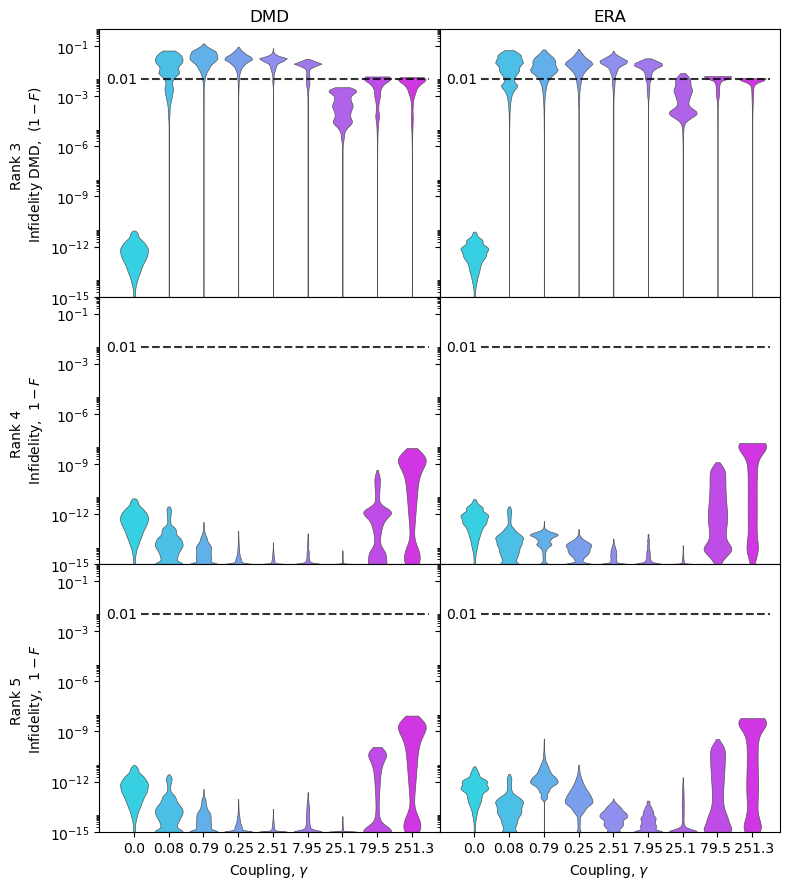

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(8,9), sharex = True, sharey = True)

sns.violinplot(ax=ax[0,0], data=df[df.Rank=="3"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$', r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0,0].set_ylim(ymin, ymax)

ax[0,0].set_ylabel('Rank 3 \n'+r'Infidelity DMD,  $(1-F)$')
ax[0,0].set_xlabel('')
ax[0,0].set_title('DMD')

ax[0,0].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0,0].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[1,0], data=df[df.Rank=="4"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1,0].set_ylim(ymin, ymax)
ax[1,0].set_xlim(0, 9.8)

ax[1,0].set_ylabel('Rank 4 \n'+r' Infidelity,  $1-F$')
ax[1,0].set_xlabel('')

ax[1,0].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1,0].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[2,0], data=df[df.Rank=="5"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2,0].set_ylim(ymin, ymax)
ax[2,0].set_xlim(0, 9.8)

ax[2,0].set_ylabel('Rank 5 \n'+r'Infidelity,  $1-F$')
ax[2,0].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 9)
xtick_labels = ['0.0','0.08', '0.79', '0.25', '2.51', '7.95', '25.1 ', '79.5 ', ' 251.3']

ax[2,0].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2,0].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2,0].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[0,1], data=df[df.Rank=="3"], x="Gamma", y='LogInF_ERA', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$', r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0,1].set_ylim(ymin, ymax)

ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_title('ERA')

ax[0,1].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0,1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[1,1], data=df[df.Rank=="4"], x="Gamma", y='LogInF_ERA', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1,1].set_ylim(ymin, ymax)
ax[1,1].set_xlim(0, 9.8)

ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')

ax[1,1].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1,1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[2,1], data=df[df.Rank=="5"], x="Gamma", y='LogInF_ERA', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2,1].set_ylim(ymin, ymax)
ax[2,1].set_xlim(-1, 8.8)

ax[2,1].set_ylabel('')
ax[2,1].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 9)
xtick_labels = [ '0.0', '0.08', '0.79', '0.25', '2.51', '7.95', '25.1 ', '79.5 ', ' 251.3']

ax[2,1].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2,1].hlines(y=np.log10(.01), xmin= 0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2,1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0, wspace=.0)

fig.show()

In [9]:
os.getcwd()

'/home/zah/github/OQSID-thesis/DMDvsERA'

In [10]:
fig.savefig("DMDvsERA_LME_4-20_LogInfid_rank-3-4-5.pdf")